<a href="https://colab.research.google.com/github/ArtemFilosofGB/ColabPractic/blob/main/BigData%D0%9F%D0%B0%D1%80%D0%B0%D0%BB%D0%BB%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import time
from pathlib import Path

In [ ]:
dataset_path = Path('genius-song-lyrics-with-language-information', 'song_lyrics.csv')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: artemfilosof
Your Kaggle Key: ··········


100%|██████████| 3.04G/3.04G [00:31<00:00, 105MB/s]


In [ ]:
!nproc

2


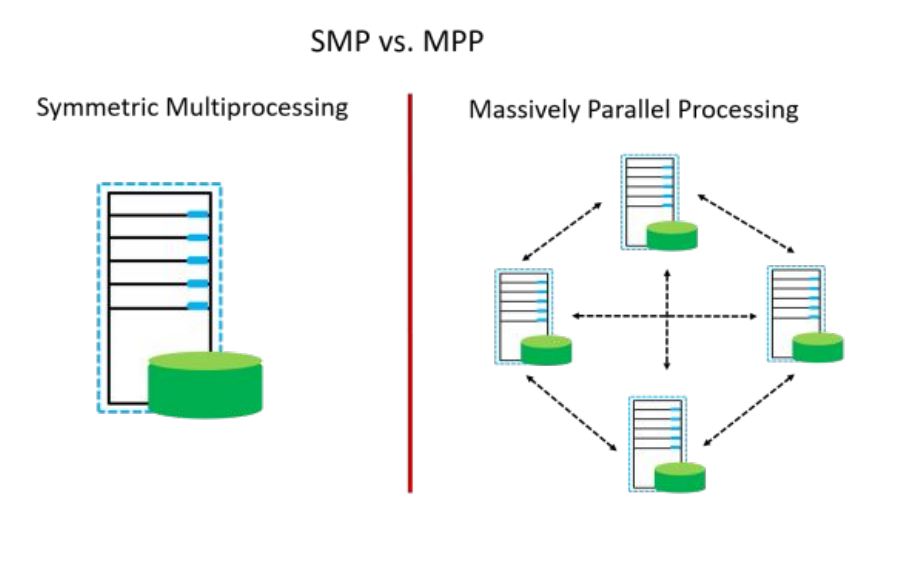

In [ ]:
# Через multiprocessing
import multiprocessing as mp
from functools import reduce


result_list = []
def log_result(result):
    result_list.append(result)

def count_songs(chunk):
    return chunk[(chunk.year == 2022) & (chunk.views > 5000)].shape[0]

def apply_async_with_callback(chunksize):
    pool = mp.Pool(2)
    for i in pd.read_csv(dataset_path, chunksize=chunksize, iterator=True):
        pool.apply_async(count_songs, args = (i, ), callback = log_result)
    pool.close()
    pool.join()
    return result_list

if __name__ == '__main__':
    chunksize = 100_000
    start_time = time.time()
    print(reduce(lambda x, y: x + y, apply_async_with_callback(chunksize)))
    print(f'Время выполнения: {round(time.time() - start_time, 2)} секунд.')

2650
Время выполнения: 246.4 секунд.


In [ ]:
from functools import reduce


def count_songs(chunk):
    return chunk[(chunk.year == 2022) & (chunk.views > 5000)].shape[0]


chunksize = 100_000
df_chunks = pd.read_csv(
    dataset_path,
    chunksize=chunksize)

start_time = time.time()
print(reduce(lambda x, y: x + y, map(count_songs, df_chunks,)))
print(f'Время выполнения: {round(time.time() - start_time, 2)} секунд.')

2650
Время выполнения: 174.13 секунд.


In [13]:
from joblib import Parallel, delayed
from functools import reduce
import csv


year_col = 3
views_col = 4


def count_songs(row):
    year = row[year_col].strip()
    views = row[views_col].strip()
    return 1 if year == '2022' and int(views) > 5_000 else 0


n = 0
start_time = time.time()
with open(dataset_path, "r", encoding='utf8') as file:
    print(reduce(lambda x, y: x + y, Parallel(n_jobs=2)(delayed(count_songs)(row) for row in csv.reader(file))))
print(f'Время выполнения: {round(time.time() - start_time, 2)} секунд.')

2650
Время выполнения: 365.04 секунд.


In [14]:
import multiprocessing
import time

def square_sum(start, end):
    return sum(i * i for i in range(start, end))

def parallel_square_sum(n):
    num_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_processes)
    chunk_size = n // num_processes
    ranges = [(i * chunk_size, (i + 1) * chunk_size) for i in range(num_processes)]

    result = sum(pool.starmap(square_sum, ranges))
    pool.close()
    pool.join()
    return result

if __name__ == "__main__":
    n = 10**8
    start_time = time.time()
    result = parallel_square_sum(n)
    print(f"Result: {result}")
    print(f"Execution Time: {time.time() - start_time}")


Result: 333333328333333350000000
Execution Time: 17.43991756439209


In [ ]:
from joblib import Parallel, delayed
import time

def square_sum(start, end):
    return sum(i * i for i in range(start, end))

def parallel_square_sum(n, num_jobs):
    chunk_size = n // num_jobs
    ranges = [(i * chunk_size, (i + 1) * chunk_size) for i in range(num_jobs)]

    result = sum(Parallel(n_jobs=num_jobs)(delayed(square_sum)(start, end) for start, end in ranges))
    return result

if __name__ == "__main__":
    n = 10**8
    num_jobs = 2  # Задаем количество задач
    start_time = time.time()
    result = parallel_square_sum(n, num_jobs)
    print(f"Result: {result}")
    print(f"Execution Time: {time.time() - start_time}")


Result: 333333328333333350000000
Execution Time: 15.372305631637573


In [ ]:
import time

def square_sum(n):
    return sum(i * i for i in range(1, n+1))

if __name__ == "__main__":
    n = 10**8
    start_time = time.time()
    result = square_sum(n)
    print(f"Result: {result}")
    print(f"Execution Time: {time.time() - start_time}")


Result: 333333338333333350000000
Execution Time: 13.919626951217651


In [16]:
import time
import random

def power(numbers, exponent):
    return [x**exponent for x in numbers]

if __name__ == "__main__":
    numbers = [random.randint(1, 100) for _ in range(10000000)]  # Большой список чисел
    exponent = 10  # Степень

    start_time = time.time()
    results = power(numbers, exponent)
    end_time = time.time()

    print(f"Sequential Execution Time: {end_time - start_time} seconds")


Sequential Execution Time: 4.801252365112305 seconds


In [15]:
import multiprocessing
import time
import random

def power(number, exponent):
    return number**exponent

def parallel_power(numbers, exponent):
    pool = multiprocessing.Pool()
    results = pool.starmap(power, [(number, exponent) for number in numbers])
    pool.close()
    pool.join()
    return results

if __name__ == "__main__":
    numbers = [random.randint(1, 100) for _ in range(1000000)]  # Большой список чисел
    exponent = 10  # Степень

    start_time = time.time()
    results = parallel_power(numbers, exponent)
    end_time = time.time()

    print(f"Parallel Execution Time: {end_time - start_time} seconds")


Parallel Execution Time: 1.8398284912109375 seconds
